<a href="https://colab.research.google.com/github/Mrain2/covid-19-data/blob/master/Marketing_Analytics_and_Campaign_Prediction_Vu_Nov2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [118]:
#Read and explore the dataset

url = 'https://drive.google.com/file/d/1ZxD4eAR1DK_2ts0u4uxZ1bOtIMnrJ3JJ/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

mktdata = pd.read_csv(dwn_url)
print(mktdata.info())
mktdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4     Income             2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [87]:
mktdata.Country.value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

# **1. DATA CLEANING & ENGINEERING**


*   Clean Icome column (column name, save as float...)
*   Change Dt_customer from 'datetime as customer' to 'number of year as customer'
*   Engineer total amount of products, purchases and ages





In [119]:
mktdata_E = mktdata
#Noticed the column lable " Income " has 2 spaces so I will remove them
mktdata_E.columns = mktdata_E.columns.str.strip(" ")

#reformat the Income variable to float 
mktdata_E['Income'] = mktdata_E['Income'].str.replace('$', '')
mktdata_E['Income'] = mktdata_E['Income'].str.replace(',', '').astype('float')

print(mktdata_E['Dt_Customer'].head())
mktdata_E.info()

0    6/16/2014
1    6/15/2014
2    5/13/2014
3    5/11/2014
4     4/8/2014
Name: Dt_Customer, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


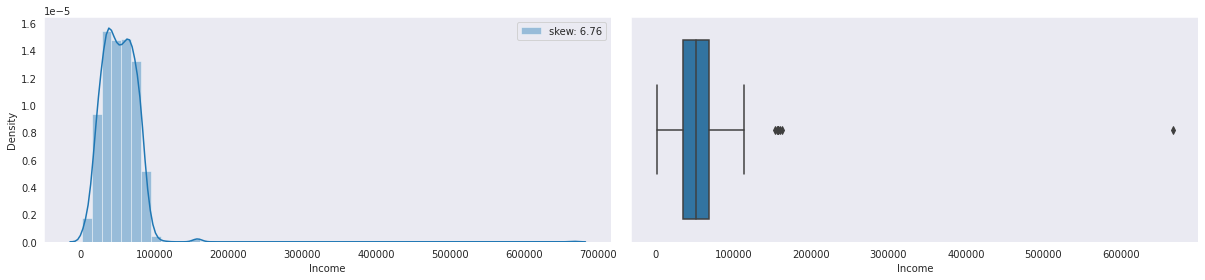

In [129]:
#Noticed Income variable has 24 missing values, I will try to explore the variable to see which method will be used to impuse 
features = ['Income']

sns.set_style('dark')
for col in features:
    plt.figure(figsize=(25,4))
    plt.subplot(131)
    sns.distplot(mktdata_E[col], label="skew: " + str(np.round(mktdata_E[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(mktdata_E[col])

    plt.tight_layout()
    plt.show()

We can see outliners which could make skewness if we impute missing values by mean, instead, we can impute by median

In [130]:
#impute missing values in Income column with the median value
mktdata_E['Income'] = mktdata_E['Income'].fillna(mktdata_E['Income'].median())

In [131]:
mktdata_E.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **Data Engineering**
Since we don't apply time-series analysis so I will transform timedate variables to 'number of years' form

*   Dt_Customer column stores the date and time a people registered as customer --> Convert to number of years as a customer
*   Year_Birth column stores the birth date of each customer --> convert to ages
*   Engineering the total amount of purchases variable
*   Engineering the total amount of products variable

*   Engineering the "ChildHome": '0' means no children, '1' means having children
*   Engineering the "UsedDeal": '0' means Haven't purchased any deal, '1' means have purchased at least 1 deal








In [132]:
# The column Dt_Customer should be stored as date and time type
mktdata_E['Dt_Customer'] = mktdata_E['Dt_Customer'].astype('datetime64[ns]')
# Calculate the number of year as a customer for each row and store in a new column
from datetime import datetime
mktdata_E['Years_as_Cust'] = pd.DatetimeIndex(mktdata_E['Dt_Customer']).year
mktdata_E['Years_as_Cust'] = 2020 - mktdata_E['Years_as_Cust']
print(mktdata['Years_as_Cust'].describe())

count    2240.000000
mean        6.971875
std         0.684554
min         6.000000
25%         7.000000
50%         7.000000
75%         7.000000
max         8.000000
Name: Years_as_Cust, dtype: float64


In [133]:
# Calculate the ages of customers
mktdata_E['Ages'] = 2020 - mktdata_E['Year_Birth']
print(mktdata_E['Ages'].describe())

count    2240.000000
mean       51.194196
std        11.984069
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: Ages, dtype: float64


In [134]:
# Calculate total amount of product purchased and save them into 'MntTotal'
columns_Mnt = ['MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds']
mktdata_E['MntTotal'] = mktdata_E[columns_Mnt].sum(axis=1)

In [135]:
# Calculate total purchases and save them into 'TotalPurchases'
columns_pur = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
mktdata_E['TotalPurchases'] = mktdata_E[columns_pur].sum(axis=1)

In [136]:
# Assign new variable "ChildHome" with '0' means no children and '1' means having children
def f(row):
    if row['Kidhome'] + row['Teenhome'] > 0:
        val = 1
    else:
        val = 0
    return val


mktdata_E['ChildHome'] = mktdata_E.apply(f, axis=1)

In [137]:
# Assign a new variable "UsedDeal": '0' means Haven't purchased any deal, '1' means have purchased at least 1 deal
def d(row):
    if row['NumDealsPurchases'] > 0:
        val = 1
    else:
        val = 0
    return val
mktdata_E['UsedDeal'] = mktdata_E.apply(d, axis=1)

In [138]:
mktdata_E.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Years_as_Cust,Ages,MntTotal,TotalPurchases,ChildHome,UsedDeal
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,6,50,1001,15,0,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,6,59,113,18,0,1
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,6,62,117,11,1,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,6,53,1,4,1,1
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,6,31,85,8,1,1


In [139]:
mktdata_E.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Years_as_Cust,Ages,MntTotal,TotalPurchases,ChildHome,UsedDeal
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.00000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,6.971875,51.194196,301.86250,14.862054,0.715179,0.979464
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,0.684554,11.984069,338.26463,7.677173,0.451430,0.141855
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,24.000000,1.00000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,43.000000,42.00000,8.000000,0.000000,1.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,50.000000,142.50000,15.000000,1.000000,1.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,61.000000,486.25000,21.000000,1.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,127.000000,1729.00000,44.000000,1.000000,1.000000


In [140]:
mktdata_E.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# **Identify the outliners & skewness**

In [141]:
mktdata_E.columns.values

array(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response',
       'Complain', 'Country', 'Years_as_Cust', 'Ages', 'MntTotal',
       'TotalPurchases', 'ChildHome', 'UsedDeal'], dtype=object)

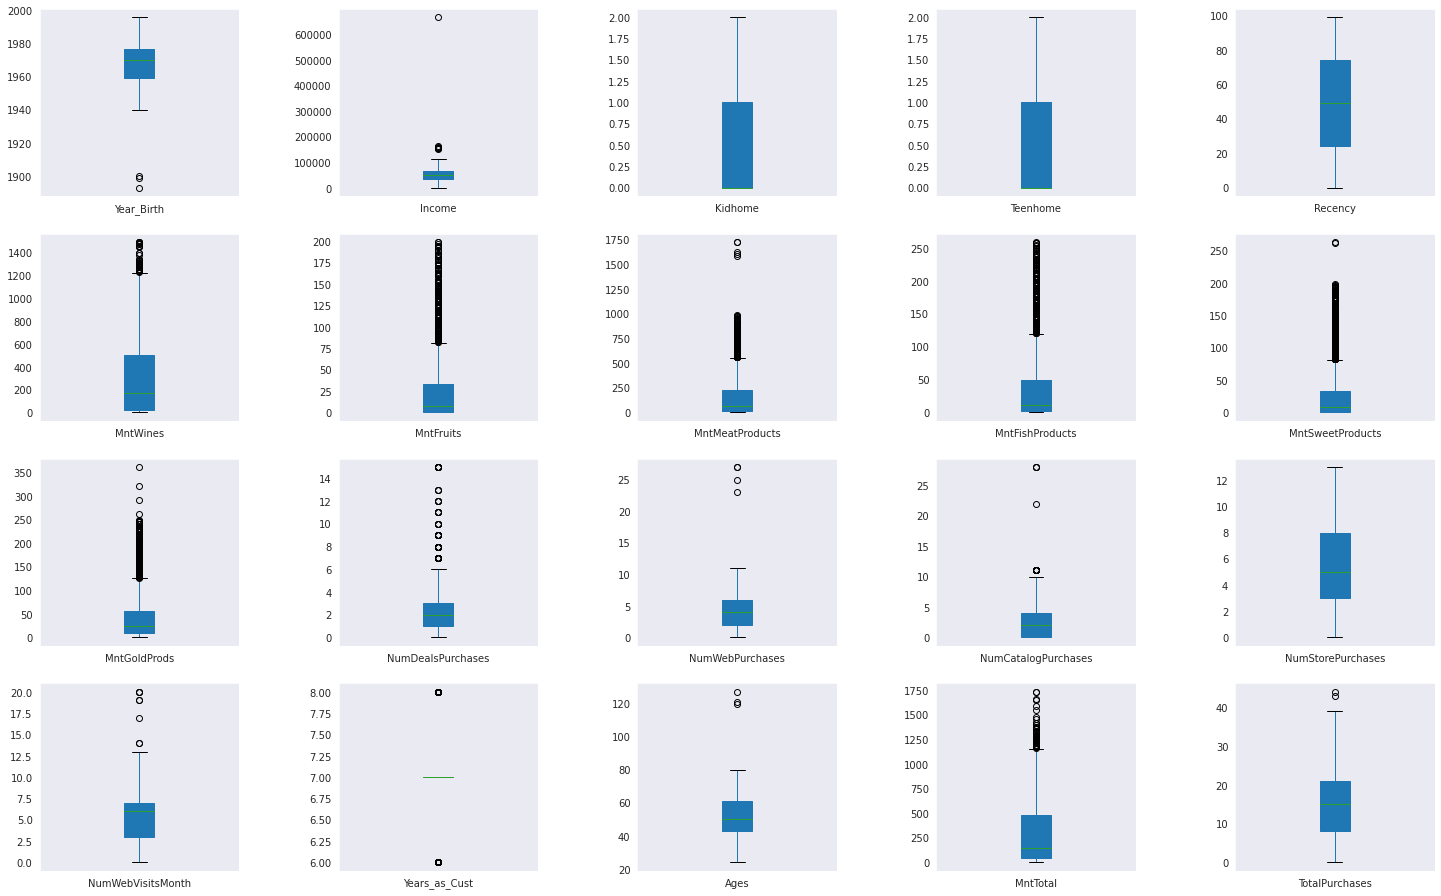

In [144]:
# Select which columns to plot, I eliminate all categorical variables and binary variables
col_to_plot = mktdata_E.drop(columns=['ID', 'Education', 'Marital_Status', 'Dt_Customer', 'Country', 'AcceptedCmp3', 'AcceptedCmp4',
                                      'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'ChildHome', 'UsedDeal'])

# subplots
sns.set_style('dark')
col_to_plot.plot(subplots=True, layout=(5,5), kind='box', figsize=(25,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [145]:
from scipy.stats import skew

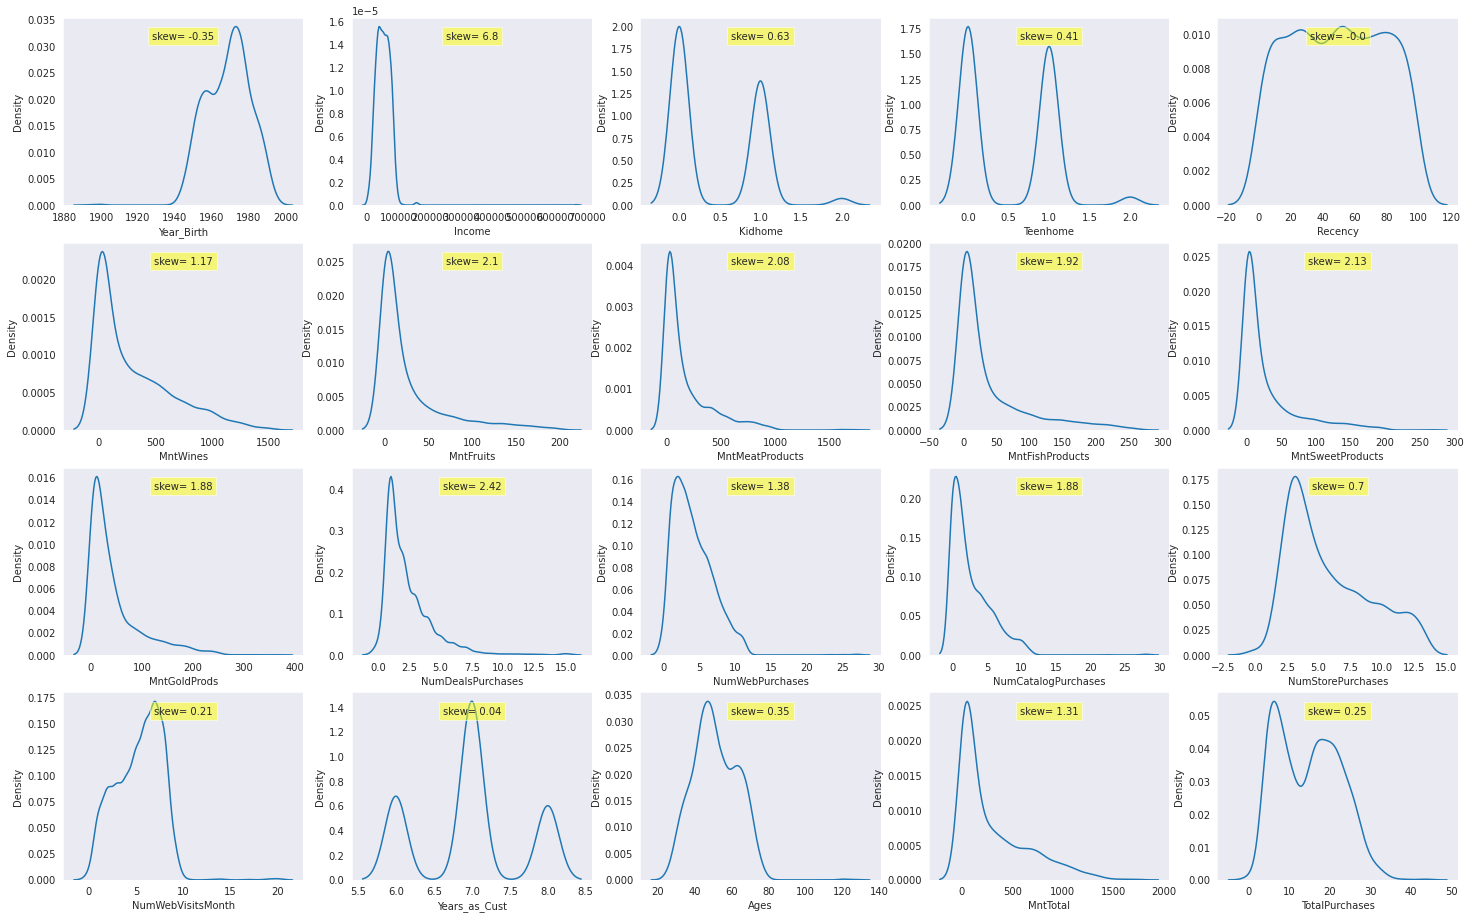

In [149]:
sns.set_style('dark')
# plot distributions with skewness index for each variable
plt.figure(figsize=(25,20))
for i, col in enumerate(col_to_plot.columns):
    ax = plt.subplot(5, 5, i+1)
    sns.kdeplot(col_to_plot[col], ax=ax)
    plt.text(0.5,0.9,"skew= " + str(round(skew(mktdata_E[col]),2)), bbox=dict(facecolor='yellow', alpha=0.5), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    plt.xlabel(col)
        
plt.show()

\*Take* a look at the correlation among variables to see which variables that I need to scale to eliminate skewness

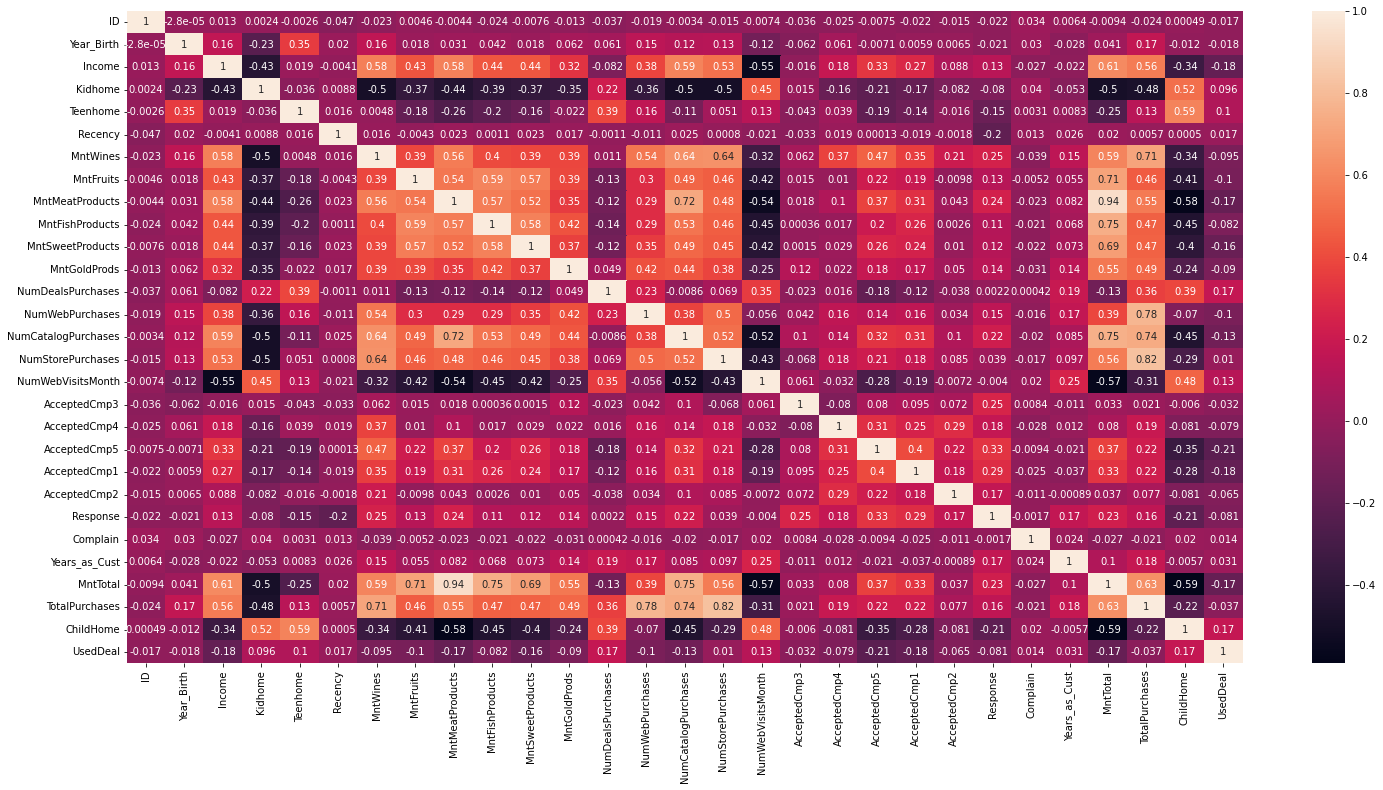

In [23]:
# Look for any correlation
plt.figure(figsize=(25,12))
sns.heatmap(mktdata.corr(), annot=True)
plt.show()

In [108]:
Q1 = mktdata.quantile(0.25)
Q3 = mktdata.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ID                      5599.50
Year_Birth                18.00
Income                 32751.00
Kidhome                    1.00
Teenhome                   1.00
Recency                   50.00
MntWines                 480.50
MntFruits                 32.00
MntMeatProducts          216.00
MntFishProducts           47.00
MntSweetProducts          32.00
MntGoldProds              47.00
NumDealsPurchases          2.00
NumWebPurchases            4.00
NumCatalogPurchases        4.00
NumStorePurchases          5.00
NumWebVisitsMonth          4.00
AcceptedCmp3               0.00
AcceptedCmp4               0.00
AcceptedCmp5               0.00
AcceptedCmp1               0.00
AcceptedCmp2               0.00
Response                   0.00
Complain                   0.00
Years_as_Cust              0.00
Ages                      18.00
MntTotal                 444.25
TotalPurchases            13.00
ChildHome                  1.00
UsedDeal                   0.00
dtype: float64


In [116]:
col_to_transform = mktdata.drop(columns=['ID', 'Education', 'Marital_Status', 'Dt_Customer', 'Country'])
col_not_transform = mktdata[['ID', 'Education', 'Marital_Status', 'Dt_Customer', 'Country']]

mktdata_out = col_to_transform[~((col_to_transform < (Q1 - 1.5 * IQR)) |(col_to_transform > (Q3 + 1.5 * IQR))).any(axis=1)]
mktdata_out = pd.concat([mktdata_out, col_not_transform], axis=1)
print(mktdata_out.shape)
mktdata_out.head()

(2240, 34)


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Years_as_Cust,Ages,MntTotal,TotalPurchases,ChildHome,UsedDeal,ID,Education,Marital_Status,Dt_Customer,Country
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1826,Graduation,Divorced,2014-06-16,SP
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Graduation,Single,2014-06-15,CA
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10476,Graduation,Married,2014-05-13,US
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1386,Graduation,Together,2014-05-11,AUS
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5371,Graduation,Single,2014-04-08,SP


Based on the plots above, I can see the errors from Year of Birth and a lot of skewnesses among variables so I will try to eliminate them
 
*   Eliminate observations with Year_Birth >= 100
*   Apply standard scaling transformation with the purpose to reduce skewness


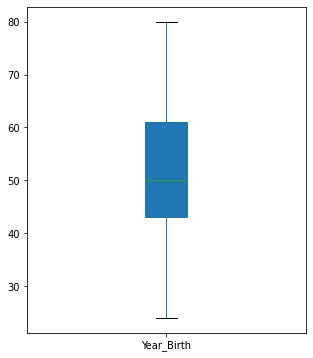

In [24]:
# Drop the observations with Year_Birth <= 1900
mktdata = mktdata[mktdata['Year_Birth'] < 100].reset_index(drop=True)
mktdata['Year_Birth'].plot(kind='box', figsize=(5,6), patch_artist=True)

In [25]:
mktdata.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Years_as_Cust,MntTotal,TotalPurchases,ChildHome,UsedDeal
0,1826,50,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,6,1001,15,0,1
1,1,59,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,6,113,18,0,1
2,10476,62,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,6,117,11,1,1
3,1386,53,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,6,1,4,1,1
4,5371,31,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,6,85,8,1,1


Code for log transformation

col_to_transform = mktdata.drop(columns=['ID', 'Education', 'Marital_Status', 'Dt_Customer', 'Kidhome', 'Teenhome',
                                      'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain',
                                     'Country'])

for i,col in enumerate(col_to_transform.columns):
  mktdata[col] = np.log(1 + mktdata[col])

# **Apply Standard Scaler to reduce skewness**

In [26]:
#Standardize skewed variables
from sklearn.preprocessing import StandardScaler
columns_scaled = mktdata.drop(['ID', 'Education', 'Marital_Status', 'Dt_Customer', 'Kidhome', 'Teenhome',
                                         'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                         'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain',
                                        'Country', 'ChildHome', 'UsedDeal'], axis=1)
scalar = StandardScaler()
columns_scaled = pd.DataFrame(scalar.fit_transform(columns_scaled), columns=columns_scaled.columns)
columns_scaled.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Years_as_Cust,MntTotal,TotalPurchases
0,-0.093881,1.302341,-1.69621,-0.341741,1.957573,0.940040,1.345050,3.922303,3.344011,-0.686563,-0.031369,0.457611,0.063267,-1.780485,-1.420324,2.069405,0.016833
1,0.675395,0.194251,-1.69621,0.475497,-0.535684,-0.456170,-0.558746,-0.655663,-0.133904,-0.686563,1.048218,0.115473,0.370940,-0.131574,-1.420324,-0.558591,0.407719
2,0.931821,0.600679,-1.69621,-0.505189,-0.384577,-0.478332,-0.412300,-0.607218,-0.268409,-0.686563,-0.391232,-0.226664,-0.244405,-1.368257,-1.420324,-0.546753,-0.504348
3,0.162544,-0.788948,-1.69621,-0.873689,-0.661606,-0.735412,-0.686886,-0.655663,-0.844859,-0.686563,-1.110957,-0.910939,-1.167421,0.692882,-1.420324,-0.890050,-1.416415
4,-1.717910,-1.228286,-1.69621,-0.885576,-0.258655,-0.633467,-0.485523,-0.655663,-0.191549,-0.169096,-0.391232,-0.568802,-1.167421,0.692882,-1.420324,-0.641455,-0.895234


In [27]:
#Adding scaled columns back to dataset
columns_notscaled = mktdata[['ID', 'Education', 'Marital_Status', 'Dt_Customer', 'Kidhome', 'Teenhome',
                                         'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                         'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain',
                                        'Country', 'ChildHome', 'UsedDeal']]
mktdata_scaled = pd.concat([columns_notscaled, columns_scaled], axis=1)
mktdata_scaled.head()

,ID,Education,Marital_Status,Dt_Customer,Kidhome,Teenhome,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Country,ChildHome,UsedDeal,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Years_as_Cust,MntTotal,TotalPurchases
0,1826,Graduation,Divorced,2014-06-16,0,0,0,0,0,0,0,1,0,SP,0,1,-0.093881,1.302341,-1.69621,-0.341741,1.957573,0.940040,1.345050,3.922303,3.344011,-0.686563,-0.031369,0.457611,0.063267,-1.780485,-1.420324,2.069405,0.016833
1,1,Graduation,Single,2014-06-15,0,0,0,1,0,0,0,1,0,CA,0,1,0.675395,0.194251,-1.69621,0.475497,-0.535684,-0.456170,-0.558746,-0.655663,-0.133904,-0.686563,1.048218,0.115473,0.370940,-0.131574,-1.420324,-0.558591,0.407719
2,10476,Graduation,Married,2014-05-13,0,1,0,0,0,0,0,0,0,US,1,1,0.931821,0.600679,-1.69621,-0.505189,-0.384577,-0.478332,-0.412300,-0.607218,-0.268409,-0.686563,-0.391232,-0.226664,-0.244405,-1.368257,-1.420324,-0.546753,-0.504348
3,1386,Graduation,Together,2014-05-11,1,1,0,0,0,0,0,0,0,AUS,1,1,0.162544,-0.788948,-1.69621,-0.873689,-0.661606,-0.735412,-0.686886,-0.655663,-0.844859,-0.686563,-1.110957,-0.910939,-1.167421,0.692882,-1.420324,-0.890050,-1.416415
4,5371,Graduation,Single,2014-04-08,1,0,0,0,1,0,0,1,0,SP,1,1,-1.717910,-1.228286,-1.69621,-0.885576,-0.258655,-0.633467,-0.485523,-0.655663,-0.191549,-0.169096,-0.391232,-0.568802,-1.167421,0.692882,-1.420324,-0.641455,-0.895234


# **Data Transformation**
Before applying any model we need to transform categorical variables into numerical variables using pandas

In [28]:
# Encoding categorical variables using pandas
cat_columns = mktdata_scaled.select_dtypes(exclude = np.number)
print("Number of unique values per categorical feature:\n", cat_columns.nunique())
dummies_cat = pd.get_dummies(cat_columns)

# Add to mktdata_model Dataframe
mktdata_model = pd.concat([mktdata_scaled,dummies_cat], axis=1)
mktdata_model = mktdata_model.drop(columns=cat_columns.columns)
mktdata_model = mktdata_model.drop(['ID'], axis=1)
mktdata_model.info()

Number of unique values per categorical feature:
 Education           5
Marital_Status      8
Dt_Customer       663
Country             8
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Kidhome                  2237 non-null   int64  
 1   Teenhome                 2237 non-null   int64  
 2   AcceptedCmp1             2237 non-null   int64  
 3   AcceptedCmp2             2237 non-null   int64  
 4   AcceptedCmp3             2237 non-null   int64  
 5   AcceptedCmp4             2237 non-null   int64  
 6   AcceptedCmp5             2237 non-null   int64  
 7   Response                 2237 non-null   int64  
 8   Complain                 2237 non-null   int64  
 9   ChildHome                2237 non-null   int64  
 10  UsedDeal                 2237 non-null   int64  
 11  Year_Birth               2237 non-n

In [29]:
mktdata_model.head()

,Kidhome,Teenhome,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,ChildHome,UsedDeal,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Years_as_Cust,MntTotal,TotalPurchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,0,0,0,0,0,0,0,1,0,0,1,-0.093881,1.302341,-1.69621,-0.341741,1.957573,0.940040,1.345050,3.922303,3.344011,-0.686563,-0.031369,0.457611,0.063267,-1.780485,-1.420324,2.069405,0.016833,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,1,0.675395,0.194251,-1.69621,0.475497,-0.535684,-0.456170,-0.558746,-0.655663,-0.133904,-0.686563,1.048218,0.115473,0.370940,-0.131574,-1.420324,-0.558591,0.407719,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,1,0.931821,0.600679,-1.69621,-0.505189,-0.384577,-0.478332,-0.412300,-0.607218,-0.268409,-0.686563,-0.391232,-0.226664,-0.244405,-1.368257,-1.420324,-0.546753,-0.504348,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0,1,1,0.162544,-0.788948,-1.69621,-0.873689,-0.661606,-0.735412,-0.686886,-0.655663,-0.844859,-0.686563,-1.110957,-0.910939,-1.167421,0.692882,-1.420324,-0.890050,-1.416415,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,1,0,1,1,-1.717910,-1.228286,-1.69621,-0.885576,-0.258655,-0.633467,-0.485523,-0.655663,-0.191549,-0.169096,-0.391232,-0.568802,-1.167421,0.692882,-1.420324,-0.641455,-0.895234,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


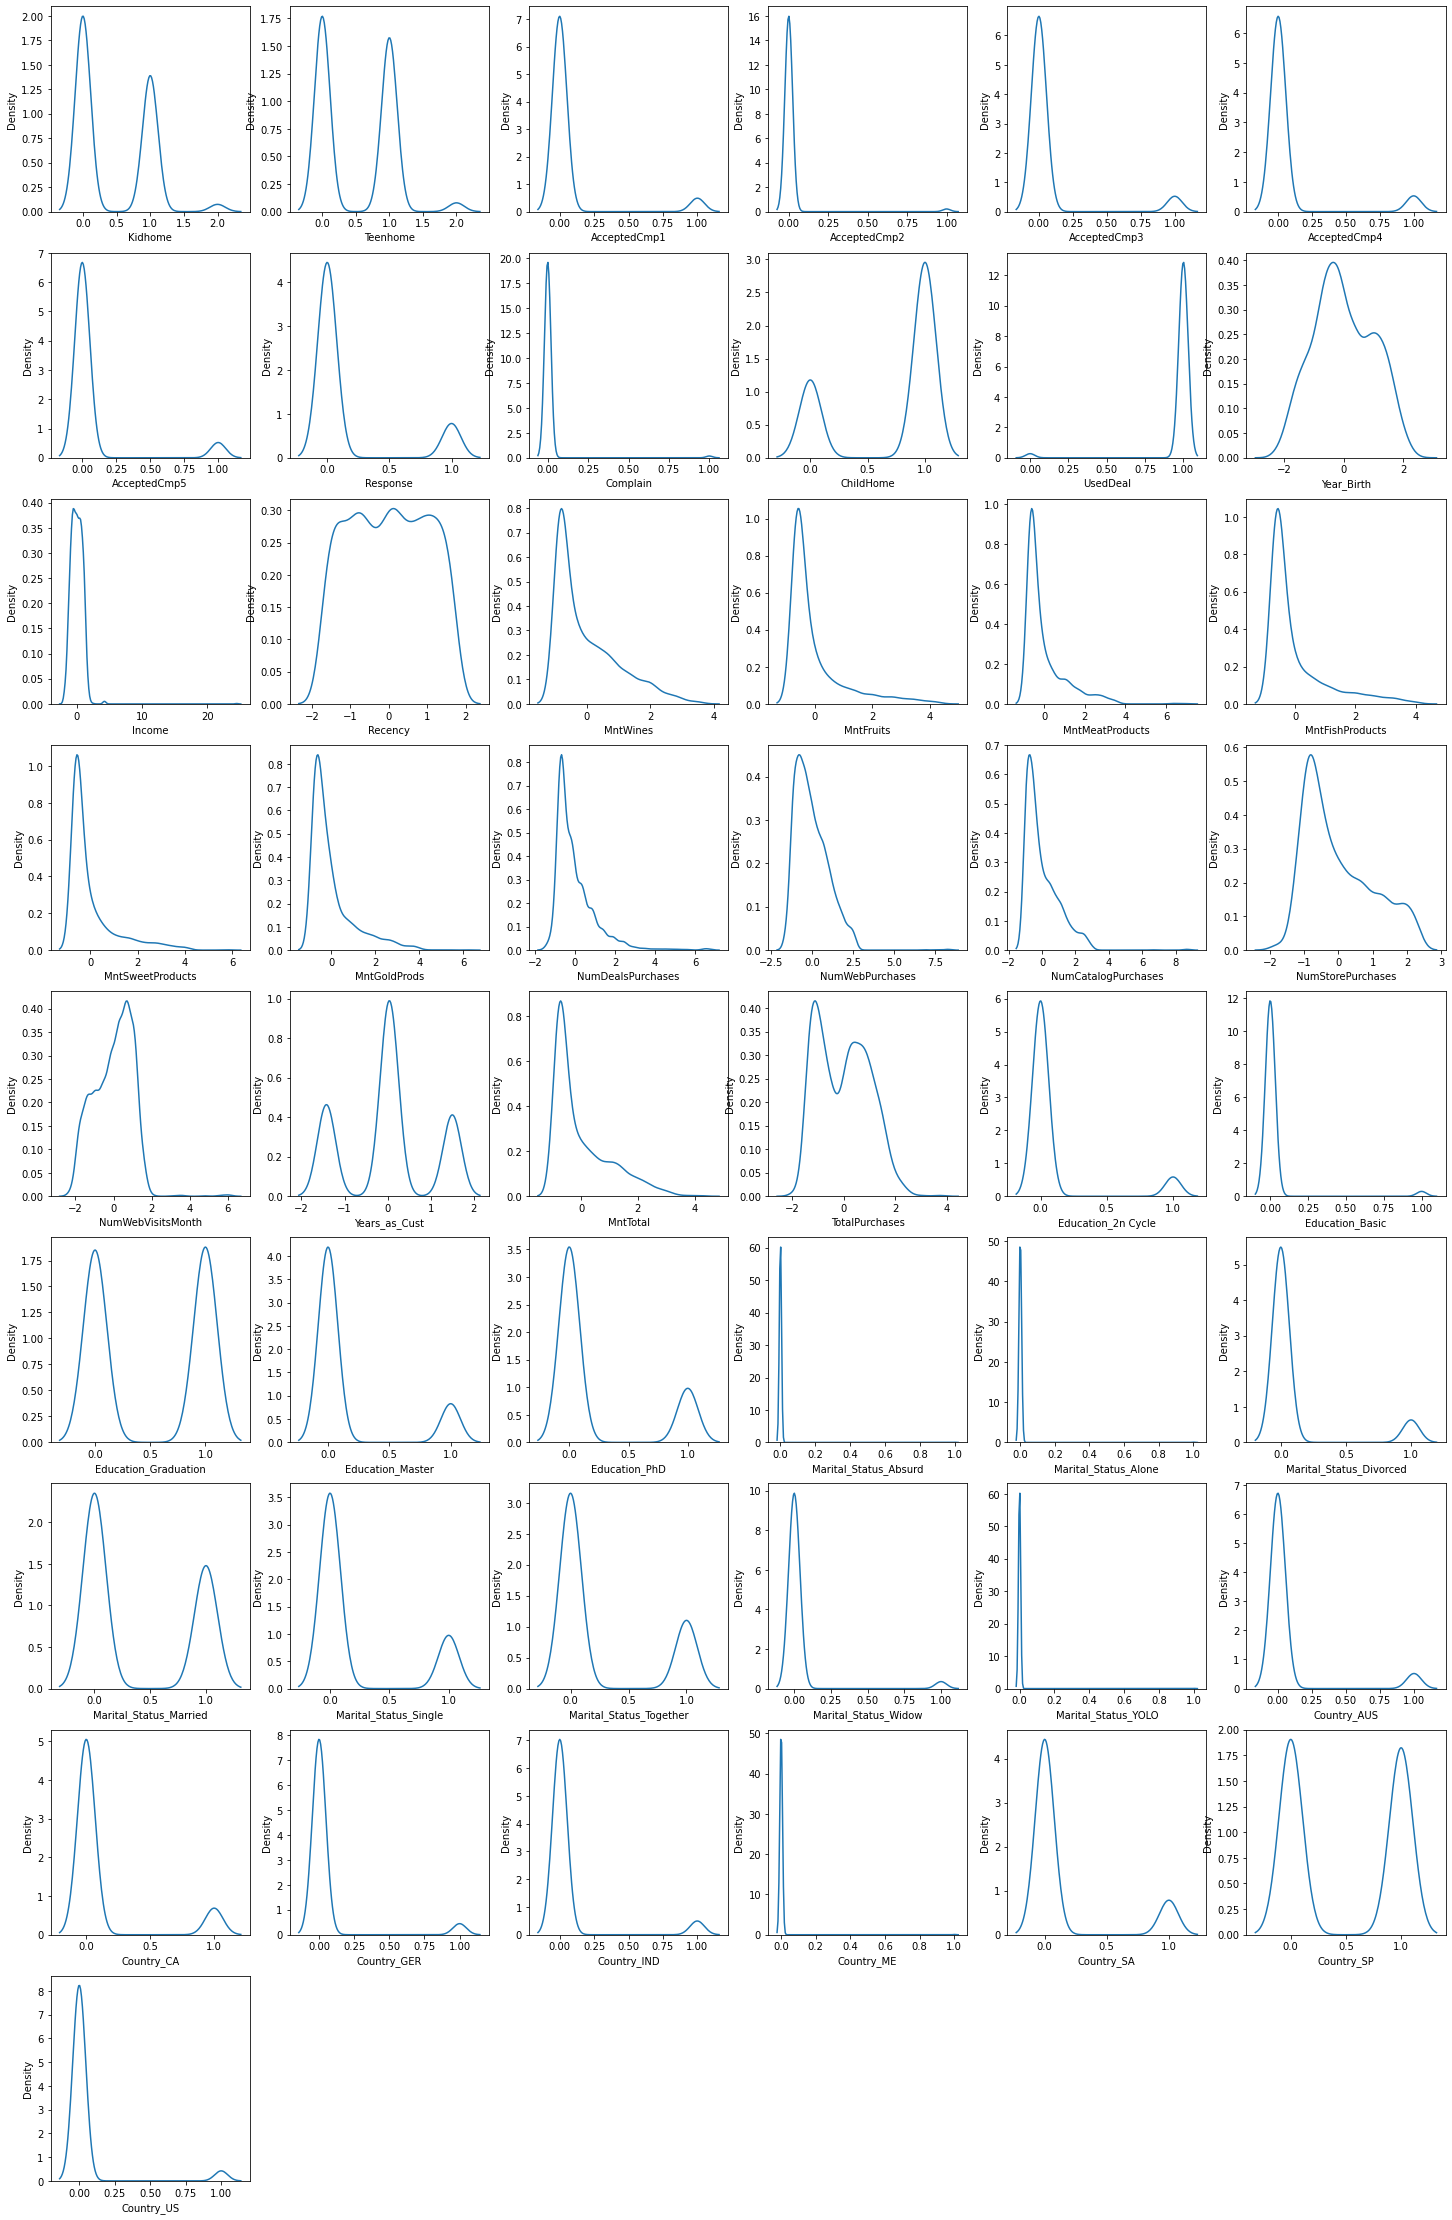

In [30]:
plt.figure(figsize=(25,40))
for i, col in enumerate(mktdata_model.columns):
    ax = plt.subplot(9, 6, i+1)
    sns.kdeplot(mktdata_model[col], ax=ax)
    plt.xlabel(col)
        
plt.show()

# **2. Clustering Analysis**

In [31]:
#Apply PCA 
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_red = pca.fit_transform(mktdata_model)

In [32]:
pca.n_components_

23

In [33]:
pcaSummary = pd.DataFrame({'std_deviation': np.sqrt(pca.explained_variance_),
              'prop_of_variance' : pca.explained_variance_ratio_,
              'cum_prop_var': np.cumsum(pca.explained_variance_ratio_)})
pcaSummary_tps = pcaSummary.transpose()
pcaSummary_tps.columns = ['PC{}'.format(i) for i in range(1,len(pcaSummary_tps.columns) + 1)]
pcaSummary_tps

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
std_deviation,2.713269,1.445988,1.138274,1.008225,0.926667,0.919569,0.847299,0.804670,0.724499,0.685152,0.656547,0.628394,0.591360,0.570135,0.566395,0.549974,0.543620,0.484146,0.480340,0.453863,0.425287,0.407810,0.366894
prop_of_variance,0.362102,0.102843,0.063729,0.049999,0.042237,0.041592,0.035312,0.031848,0.025818,0.023090,0.021202,0.019423,0.017201,0.015988,0.015779,0.014877,0.014536,0.011529,0.011349,0.010132,0.008896,0.008180,0.006621
cum_prop_var,0.362102,0.464945,0.528674,0.578673,0.620910,0.662502,0.697814,0.729661,0.755479,0.778569,0.799771,0.819194,0.836394,0.852383,0.868162,0.883039,0.897575,0.909104,0.920453,0.930585,0.939481,0.947661,0.954282


In [34]:
pcacomponents_df = pd.DataFrame(pca.components_.transpose(), columns=pcaSummary_tps.columns,
                                index=mktdata_model.columns)

In [35]:
pcacomponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Kidhome,-0.120772,0.017091,-0.091375,0.001047,0.100869,-0.025191,0.151947,-0.005055,0.045182,0.080669,0.081993,0.056436,-0.092083,0.038237,-0.021023,0.093096,0.003216,-0.013787,0.013355,0.104492,-0.057834,-0.844281,-0.116118
Teenhome,-0.022465,0.187633,0.180913,-0.024065,-0.032172,-0.116837,0.061508,-0.028248,-0.126667,0.128340,0.073270,-0.006875,-0.048055,-0.035781,0.014952,-0.107564,0.011520,-0.205674,-0.166678,-0.706110,0.137150,0.090529,0.066189
AcceptedCmp1,0.030883,-0.016542,0.002603,0.009428,0.003660,0.031421,-0.017213,0.018328,0.061224,0.001970,-0.002343,0.015835,-0.077765,-0.012053,-0.021509,-0.020045,-0.011107,-0.003013,-0.037369,0.058630,-0.002577,-0.025137,-0.014435
AcceptedCmp2,0.003463,0.002695,0.005585,0.001190,0.001124,0.017701,-0.014173,0.008472,0.007348,-0.005464,0.001343,-0.000231,-0.033384,0.012613,-0.007004,-0.014426,-0.012087,-0.003592,-0.004998,0.013411,-0.006345,0.008486,-0.007164
AcceptedCmp3,0.002685,0.002129,-0.018319,0.012037,0.005403,0.003877,-0.018841,0.061613,0.054672,-0.005305,0.004268,-0.023410,-0.038887,-0.012421,0.045623,-0.048316,-0.015222,0.023915,0.014389,-0.011847,-0.004498,-0.058626,0.010033
AcceptedCmp4,0.016056,0.023756,0.032813,-0.000665,0.009330,0.066838,-0.041588,-0.004607,0.035310,-0.013808,0.017399,0.005302,-0.098749,0.019343,-0.042183,-0.024029,-0.017634,-0.029935,-0.079777,0.053718,0.027351,0.054064,-0.026228
AcceptedCmp5,0.036466,-0.025194,0.009780,0.004822,0.005422,0.069459,-0.037646,0.026014,0.054694,0.012789,0.008695,-0.027657,-0.104326,0.019163,-0.033733,0.003759,-0.003538,-0.049216,-0.082576,0.098944,-0.000904,-0.030282,-0.021972
Response,0.027644,0.011483,-0.047129,0.072778,-0.053973,0.078261,0.003228,0.062149,0.111043,0.009882,0.019506,-0.032540,-0.059924,0.037616,0.034853,-0.018707,0.044284,0.115440,-0.109106,0.109268,-0.053948,-0.070447,0.061099
Complain,-0.000921,0.000430,-0.001231,-0.000915,-0.001827,-0.000184,0.001535,-0.002865,-0.001989,-0.000691,0.001458,-0.001631,0.004315,-0.001918,-0.005147,-0.007154,0.002743,0.003038,0.001680,0.001406,0.002551,-0.008095,0.000875
ChildHome,-0.088686,0.135730,0.027590,0.002349,0.070263,-0.077668,0.032770,-0.033646,-0.057930,0.104217,0.068734,0.028095,-0.046378,-0.023755,0.011564,-0.074290,-0.017023,-0.139832,-0.029090,-0.390523,0.077526,-0.357796,-0.002940


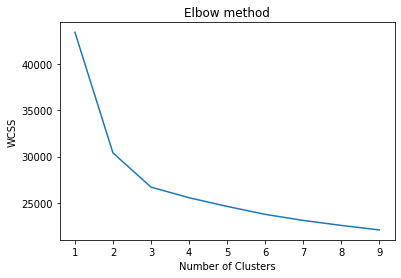

In [36]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

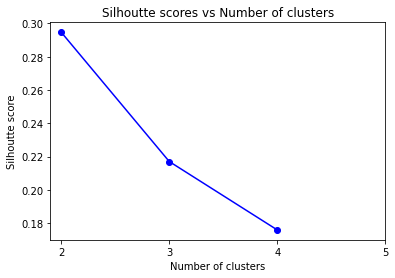

In [37]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(X_red, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4, 5])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [38]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of our model is 0.21702856508202586


In [39]:
#adding cluster labels column into dataset
mktdata['cluster_id'] = kmeans.labels_
mktdata_model['cluster_id'] = kmeans.labels_

In [40]:
# Partition and transform data before modeling 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
r_state = 3


# isolate X and y variables, and perform train-test split
X = mktdata_model.drop(['Response'], axis=1)
y = mktdata_model['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [41]:
mktdata.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Years_as_Cust,MntTotal,TotalPurchases,ChildHome,UsedDeal,cluster_id
0,1826,50,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,6,1001,15,0,1,2
1,1,59,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,6,113,18,0,1,1
2,10476,62,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,6,117,11,1,1,0
3,1386,53,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,6,1,4,1,1,0
4,5371,31,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,6,85,8,1,1,0


In [42]:
mktdata.groupby('cluster_id').mean()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Years_as_Cust,MntTotal,TotalPurchases,ChildHome,UsedDeal
cluster_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5603.894380,48.458333,35264.704942,0.767442,0.454457,49.543605,41.401163,4.819767,22.328488,6.854651,5.023256,15.177326,1.963178,2.061047,0.552326,3.202519,6.383721,0.071705,0.013566,0.000969,0.000969,0.001938,0.086240,0.010659,6.850775,54.203488,7.779070,0.874031,0.990310
1,5519.925633,55.139241,57607.019778,0.287975,0.871835,47.526899,468.363924,21.463608,133.753165,29.783228,21.887658,59.151899,3.805380,6.354430,3.031646,7.691456,5.835443,0.068038,0.140823,0.031646,0.039557,0.018987,0.132911,0.007911,7.155063,266.039557,20.882911,0.901899,0.995253
2,5645.101222,51.396161,76844.500873,0.034904,0.197208,50.054101,595.647469,70.205934,463.905759,101.294939,72.488656,79.076789,1.350785,5.235602,6.055846,8.369983,2.832461,0.080279,0.111693,0.246073,0.205934,0.027923,0.280977,0.006981,6.989529,786.972077,21.012216,0.223386,0.942408


In [43]:
mktdata_model.groupby('cluster_id').mean()

,Kidhome,Teenhome,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,ChildHome,UsedDeal,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Years_as_Cust,MntTotal,TotalPurchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
cluster_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.767442,0.454457,0.000969,0.001938,0.071705,0.013566,0.000969,0.086240,0.010659,0.874031,0.990310,-0.225656,-0.677487,0.015164,-0.780372,-0.540223,-0.640875,-0.561407,-0.533989,-0.553226,-0.188150,-0.729126,-0.721968,-0.797439,0.438834,-0.177502,-0.732596,-0.924020,0.107558,0.050388,0.489341,0.163760,0.188953,0.00000,0.001938,0.096899,0.392442,0.229651,0.253876,0.025194,0.000000,0.072674,0.113372,0.053295,0.070736,0.000000,0.141473,0.505814,0.042636
1,0.287975,0.871835,0.039557,0.018987,0.068038,0.140823,0.031646,0.132911,0.007911,0.901899,0.995253,0.345396,0.214861,-0.054498,0.488466,-0.121058,-0.146995,-0.141683,-0.125499,0.291745,0.765128,0.815902,0.126300,0.583681,0.212819,0.267006,-0.105677,0.783348,0.055380,0.001582,0.465190,0.193038,0.284810,0.00000,0.001582,0.129747,0.397152,0.164557,0.261076,0.042722,0.003165,0.075949,0.125000,0.052215,0.061709,0.003165,0.159810,0.463608,0.058544
2,0.034904,0.197208,0.205934,0.027923,0.080279,0.111693,0.246073,0.280977,0.006981,0.223386,0.942408,0.025456,0.983202,0.032798,0.866724,1.106490,1.316378,1.167392,1.100160,0.674602,-0.505043,0.413277,1.160993,0.792445,-1.025094,0.025191,1.435999,0.800196,0.095986,0.001745,0.572426,0.137871,0.191972,0.00349,0.000000,0.085515,0.363002,0.240838,0.265271,0.041885,0.000000,0.064572,0.125654,0.055846,0.061082,0.001745,0.155323,0.486911,0.048866


# **Based on the demographic of each group, I try to label them as their characteristics**

1.   Cluster_id = 0: Low income & less spending = L&L
2.   Cluster_id = 2: High income & Loyal = H&H
1.   Cluster_id = 1: Medium income & medium speding = M&M 

In [44]:
#change label name of cluster_id
mktdata = mktdata.assign(cluster_cat=pd.cut(mktdata['cluster_id'], 
                               bins=[-1, 0.5, 1.5, 2.5], 
                               labels=['L&L', 'M&M', 'H&H']))
mktdata.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Years_as_Cust,MntTotal,TotalPurchases,ChildHome,UsedDeal,cluster_id,cluster_cat
0,1826,50,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,6,1001,15,0,1,2,H&H
1,1,59,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,6,113,18,0,1,1,M&M
2,10476,62,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,6,117,11,1,1,0,L&L
3,1386,53,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,6,1,4,1,1,0,L&L
4,5371,31,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,6,85,8,1,1,0,L&L


# **3. Applying Modeling to predict Campaign Response**

# **Logistic regression**

In [45]:
# Logistic regression model
lored = LogisticRegression()
lored.fit(X_train, y_train)

# predictions
y_pred = lored.predict(X_test)

# evaluate model using RMSE
print("Logistic regression model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Median value of target variable: ", y.median())

Logistic regression model RMSE:  0.3380617018914066
Median value of target variable:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [46]:
# import the metrics class
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[454,  16],
       [ 48,  42]])

Text(0.5, 257.44, 'Predicted label')

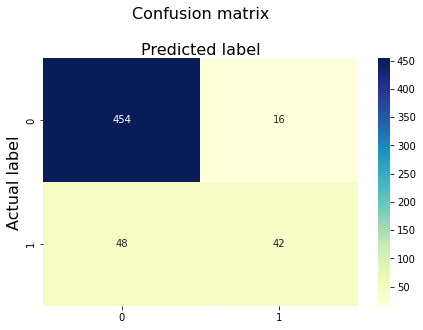

In [47]:
cls_names=[0,1] # name  of classes
fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average="binary"))

Accuracy: 0.8857142857142857
Precision: 0.7241379310344828
Recall: 0.4666666666666667
F1 Score: 0.5675675675675675


# **Dicision Tree**

In [49]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [50]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8625


In [51]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[457,  13],
       [ 64,  26]])

Text(0.5, 257.44, 'Predicted label')

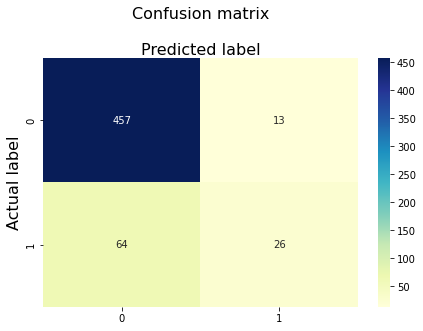

In [52]:
cls_names=[0,1] # name  of classes
fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average="binary"))

Accuracy: 0.8625
Precision: 0.6666666666666666
Recall: 0.28888888888888886
F1 Score: 0.40310077519379844


In [54]:
!pip install graphviz

In [55]:
!pip install pydotplus

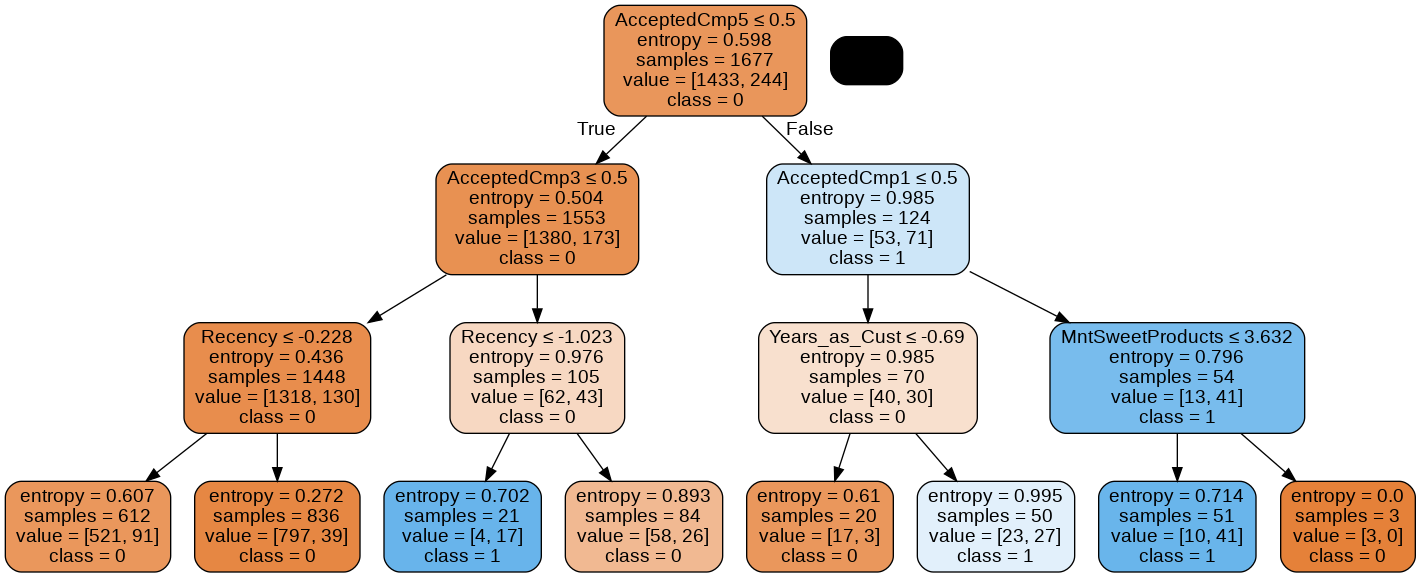

In [56]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_mktdata.png')
Image(graph.create_png())

# **Gradient Boosting Classifier**

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_GBC = GradientBoostingClassifier(random_state = r_state)
classifier_GBC.fit(X_train, y_train)

y_pred_GBC = classifier_GBC.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8625


Tunning model

Code for tunning model

from sklearn.model_selection import RandomizedSearchCV

grid = {
    'learning_rate' : [0.2, 0.3, 0.4, 0.5],
    'n_estimators' : [300, 500, 700, 900],
    'min_samples_split' : [3, 4, 5, 6],
    'max_depth' : [2, 3, 4, 5],
    'loss' : ['deviance', 'exponential']
}
random_cv = RandomizedSearchCV(estimator=classifier_GBC,
                              param_distributions=grid,
                              n_iter=20,
                              n_jobs=-1,
                              cv=5,
                              verbose=7,
                              random_state=10,
                              scoring='accuracy')
random_cv.fit(X_train, y_train)

random_cv.best_estimator_

In [58]:
hgb = GradientBoostingClassifier(learning_rate=0.3, loss='exponential', max_depth=2,
                           min_samples_split=3, n_estimators=500,
                           random_state=3)
hgb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.3, loss='exponential', max_depth=2,
                           min_samples_split=3, n_estimators=500,
                           random_state=3)

In [59]:
y_pred = hgb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8839285714285714


In [60]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[452,  18],
       [ 47,  43]])

Text(0.5, 257.44, 'Predicted label')

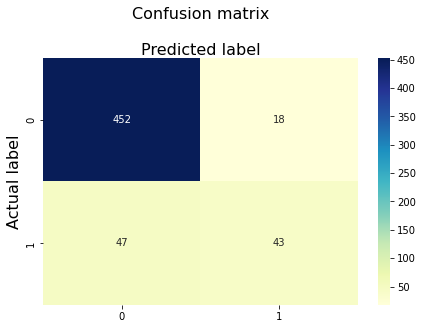

In [61]:
cls_names=[0,1] # name  of classes
fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average="binary"))

Accuracy: 0.8839285714285714
Precision: 0.7049180327868853
Recall: 0.4777777777777778
F1 Score: 0.5695364238410596


# **Neural Network**

In [63]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
# set Hyper parameters
learning_rate=0.01
no_epochs=100


In [64]:
# Model creation

model = Sequential([
    Flatten(input_shape=(49,)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [65]:
#Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [66]:
# Fit model
model.fit(X_train, y_train, epochs=no_epochs, batch_size=len(mktdata_model),  verbose=2)


Epoch 1/100
1/1 - 1s - loss: 0.6456 - accuracy: 0.6553 - 815ms/epoch - 815ms/step
Epoch 2/100
1/1 - 0s - loss: 0.6356 - accuracy: 0.6828 - 5ms/epoch - 5ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6259 - accuracy: 0.7066 - 4ms/epoch - 4ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6166 - accuracy: 0.7239 - 5ms/epoch - 5ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6075 - accuracy: 0.7478 - 4ms/epoch - 4ms/step
Epoch 6/100
1/1 - 0s - loss: 0.5988 - accuracy: 0.7627 - 4ms/epoch - 4ms/step
Epoch 7/100
1/1 - 0s - loss: 0.5903 - accuracy: 0.7776 - 4ms/epoch - 4ms/step
Epoch 8/100
1/1 - 0s - loss: 0.5821 - accuracy: 0.7883 - 4ms/epoch - 4ms/step
Epoch 9/100
1/1 - 0s - loss: 0.5741 - accuracy: 0.8044 - 8ms/epoch - 8ms/step
Epoch 10/100
1/1 - 0s - loss: 0.5664 - accuracy: 0.8157 - 9ms/epoch - 9ms/step
Epoch 11/100
1/1 - 0s - loss: 0.5589 - accuracy: 0.8259 - 5ms/epoch - 5ms/step
Epoch 12/100
1/1 - 0s - loss: 0.5516 - accuracy: 0.8312 - 5ms/epoch - 5ms/step
Epoch 13/100
1/1 - 0s - loss: 0.5445 - accuracy: 0.8354 -

In [67]:
y_pred = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


18/18 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8571
Test accuracy: 0.8571428656578064


# Analyze with labels of groups 

In [68]:
# Adding the prediction responses to dataset
mktdata['Response_pred'] = hgb.predict(mktdata_model.drop(['Response'], axis=1))
mktdata.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Years_as_Cust,MntTotal,TotalPurchases,ChildHome,UsedDeal,cluster_id,cluster_cat,Response_pred
0,1826,50,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,6,1001,15,0,1,2,H&H,1
1,1,59,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,6,113,18,0,1,1,M&M,1
2,10476,62,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,6,117,11,1,1,0,L&L,0
3,1386,53,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,6,1,4,1,1,0,L&L,0
4,5371,31,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,6,85,8,1,1,0,L&L,1


cluster_cat           L&L         M&M         H&H
Response_pred                                    
0              959.000000  564.000000  416.000000
1               73.000000   68.000000  157.000000
%Repsonse        7.073643   10.759494   27.399651


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


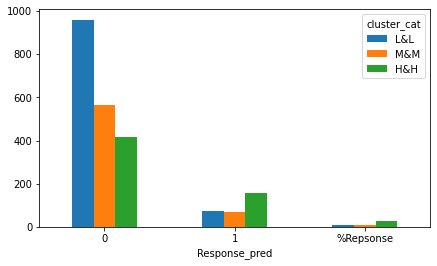

In [69]:
CrosstabResult = pd.crosstab(index=mktdata['Response_pred'],columns=mktdata['cluster_cat'])
CrosstabResult.loc['%Repsonse'] = (CrosstabResult.loc[1]/ (CrosstabResult.loc[1]+CrosstabResult.loc[0]))*100
print(CrosstabResult)
#df.loc['d'] = df.loc['a'] / df.loc['b']

# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(7,4), rot=0)


So the H&H group is likely to response to our campaign and the L&L is the least likely to repsonse

In [70]:
# Create data frame for H&H group who likely to response "Yes" to our next campaign
mktdata_H = mktdata.loc[mktdata['cluster_id'] == 2]
mktdata_H = mktdata_H.loc[mktdata_H['Response_pred'] == 1]

# Create data frame for M&M group who likely to response "No" to our next campaign
mktdata_L = mktdata.loc[mktdata['cluster_id'] == 0]
mktdata_L = mktdata_L.loc[mktdata_L['Response_pred'] == 0]

# Create data frame for M&M group who likely to response "No" to our next campaign
mktdata_M = mktdata.loc[mktdata['cluster_id'] == 1]
mktdata_M = mktdata_M.loc[mktdata_M['Response_pred'] == 0]


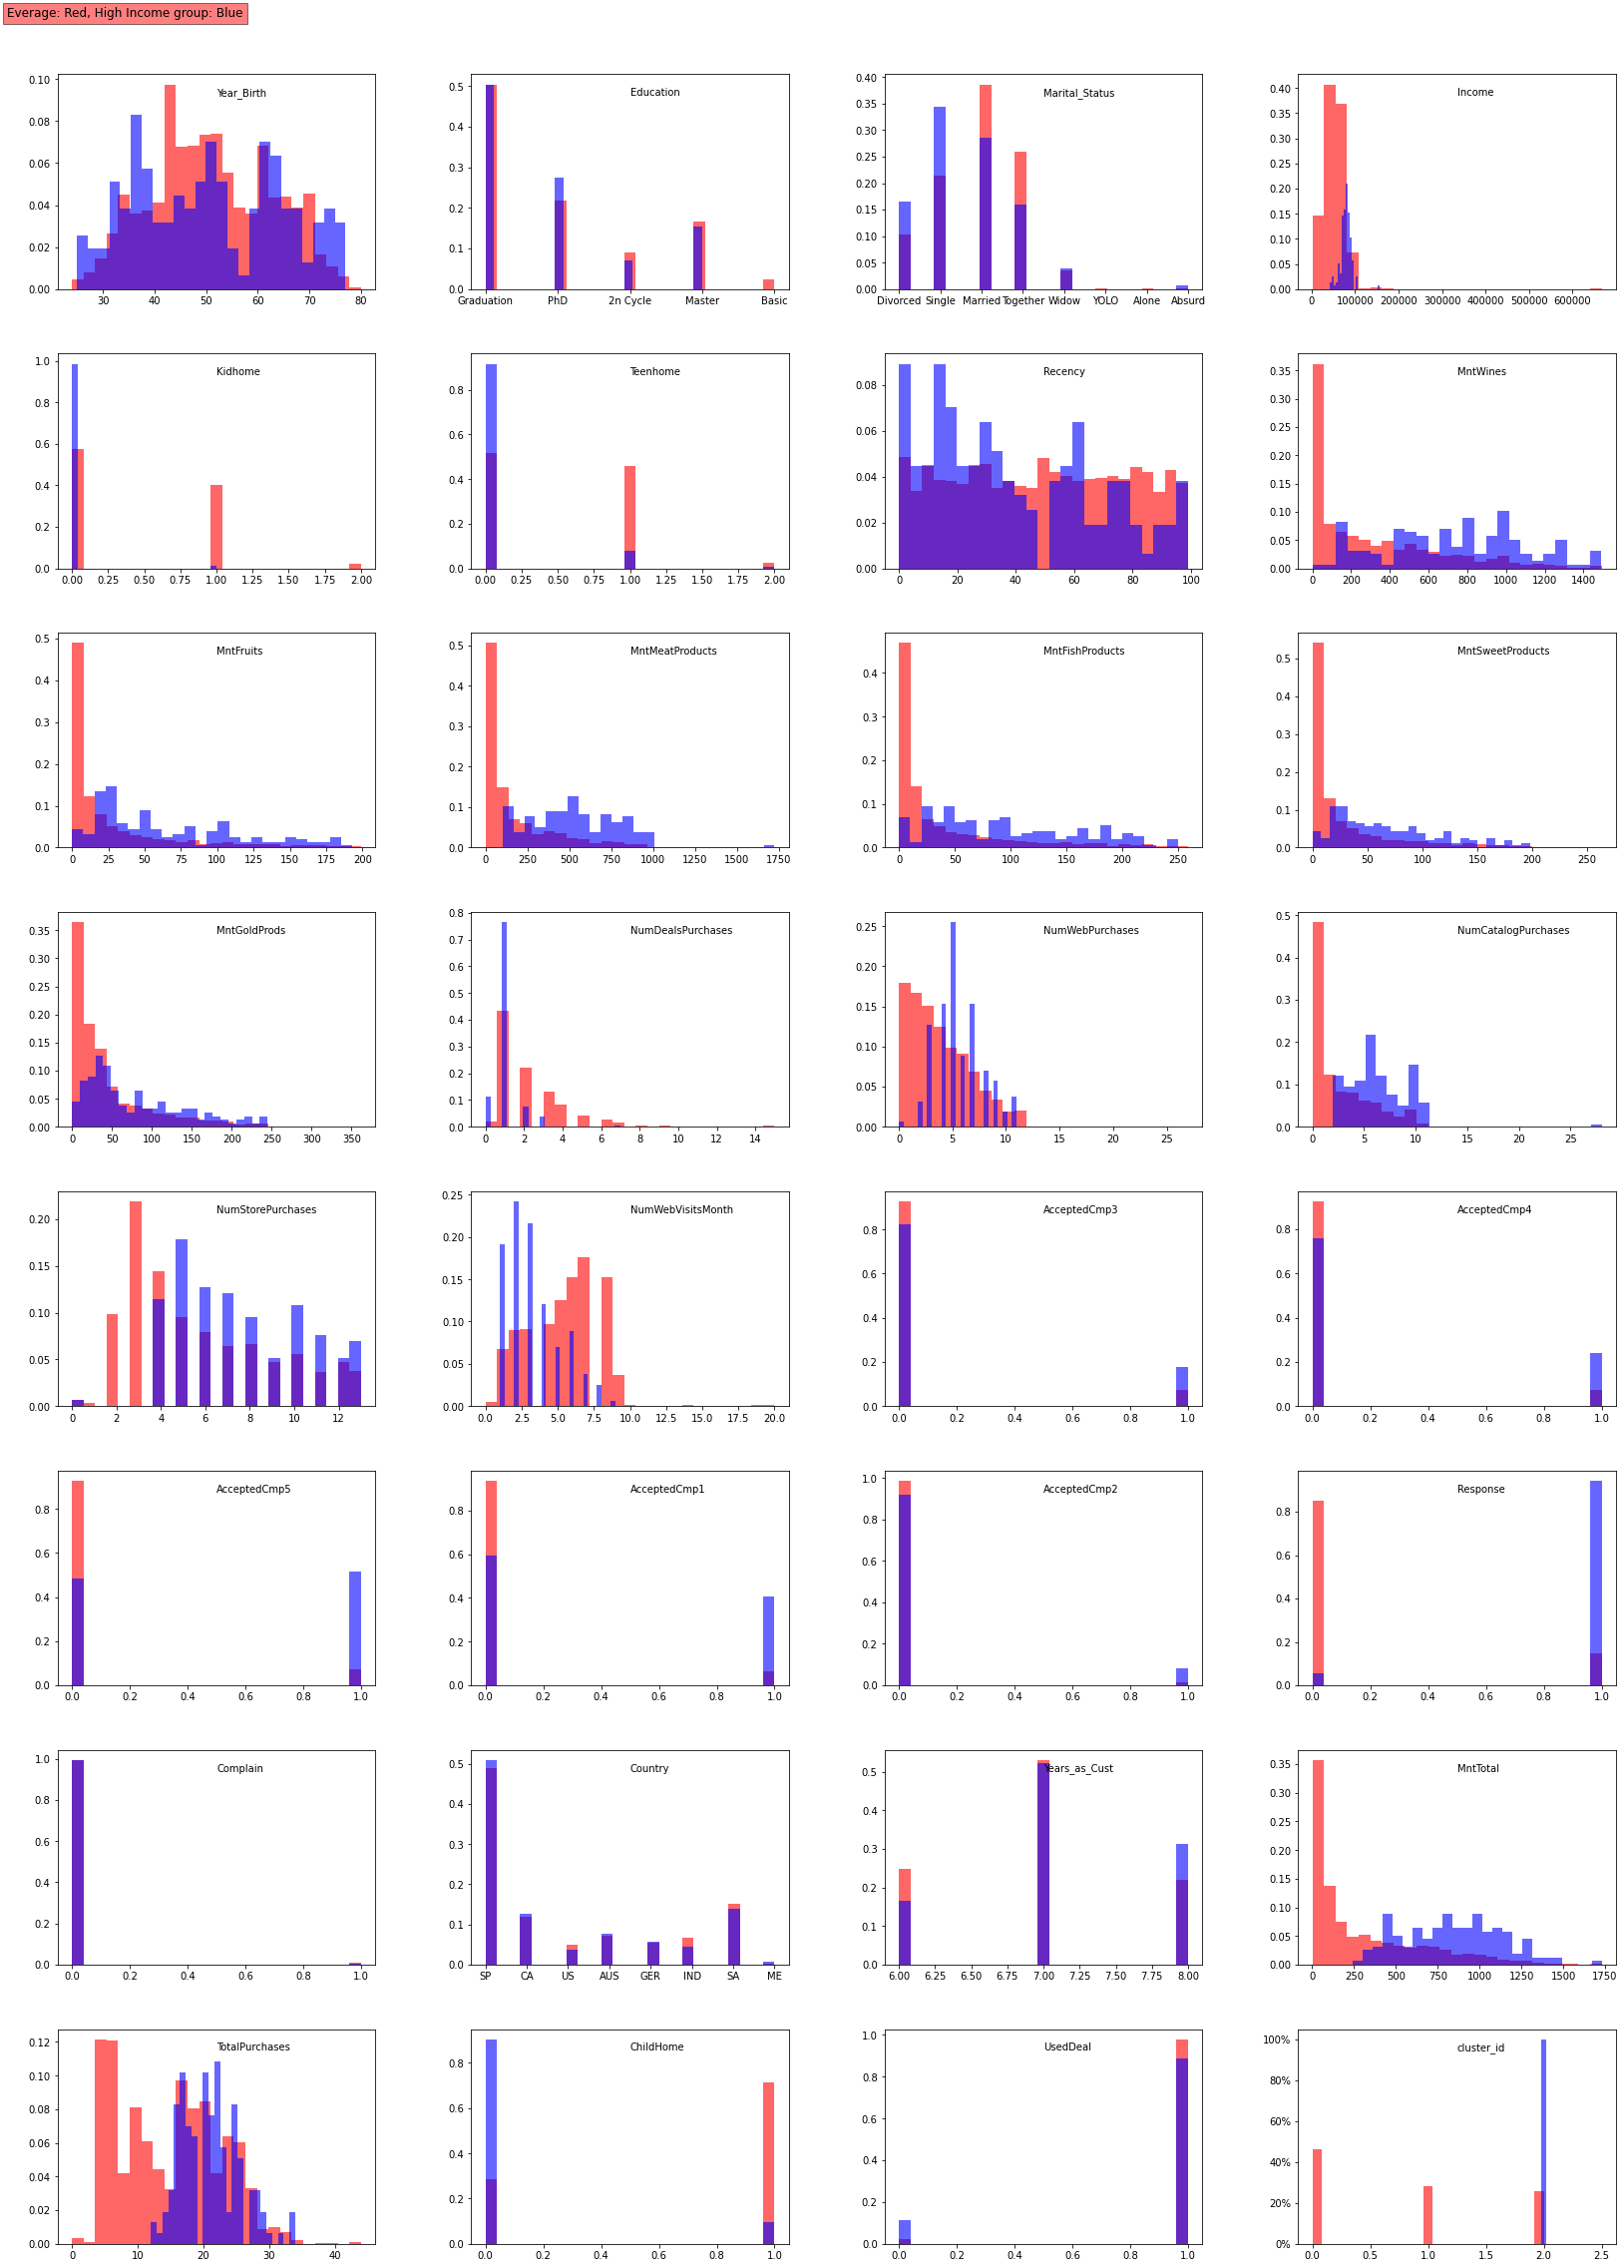

In [71]:
plt_a = mktdata.drop(['ID', 'Dt_Customer'], axis=1)
plt_b = mktdata_H.drop(['ID', 'Dt_Customer'], axis=1)


from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(8,4, figsize=(28, 40))
fig.subplots_adjust(hspace = .3, wspace=.3)

count = 0

for count, item in enumerate(axs.reshape(-1)):
  item.hist(plt_a.iloc[:,count], color = 'red',weights=np.ones(len(plt_a.iloc[:,count])) / len(plt_a.iloc[:,count]), alpha=0.6, bins=25, label=plt_a.columns[count])
  item.hist(plt_b.iloc[:,count], color = 'blue',weights=np.ones(len(plt_b.iloc[:,count])) / len(plt_b.iloc[:,count]), alpha=0.6, bins=25, label=plt_b.columns[count])
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  #Title 
  item.text(0.5,0.9,plt_a.columns[count],transform=item.transAxes)

fig.text(0.1,0.9, 'Everage: Red, High Income group: Blue',fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

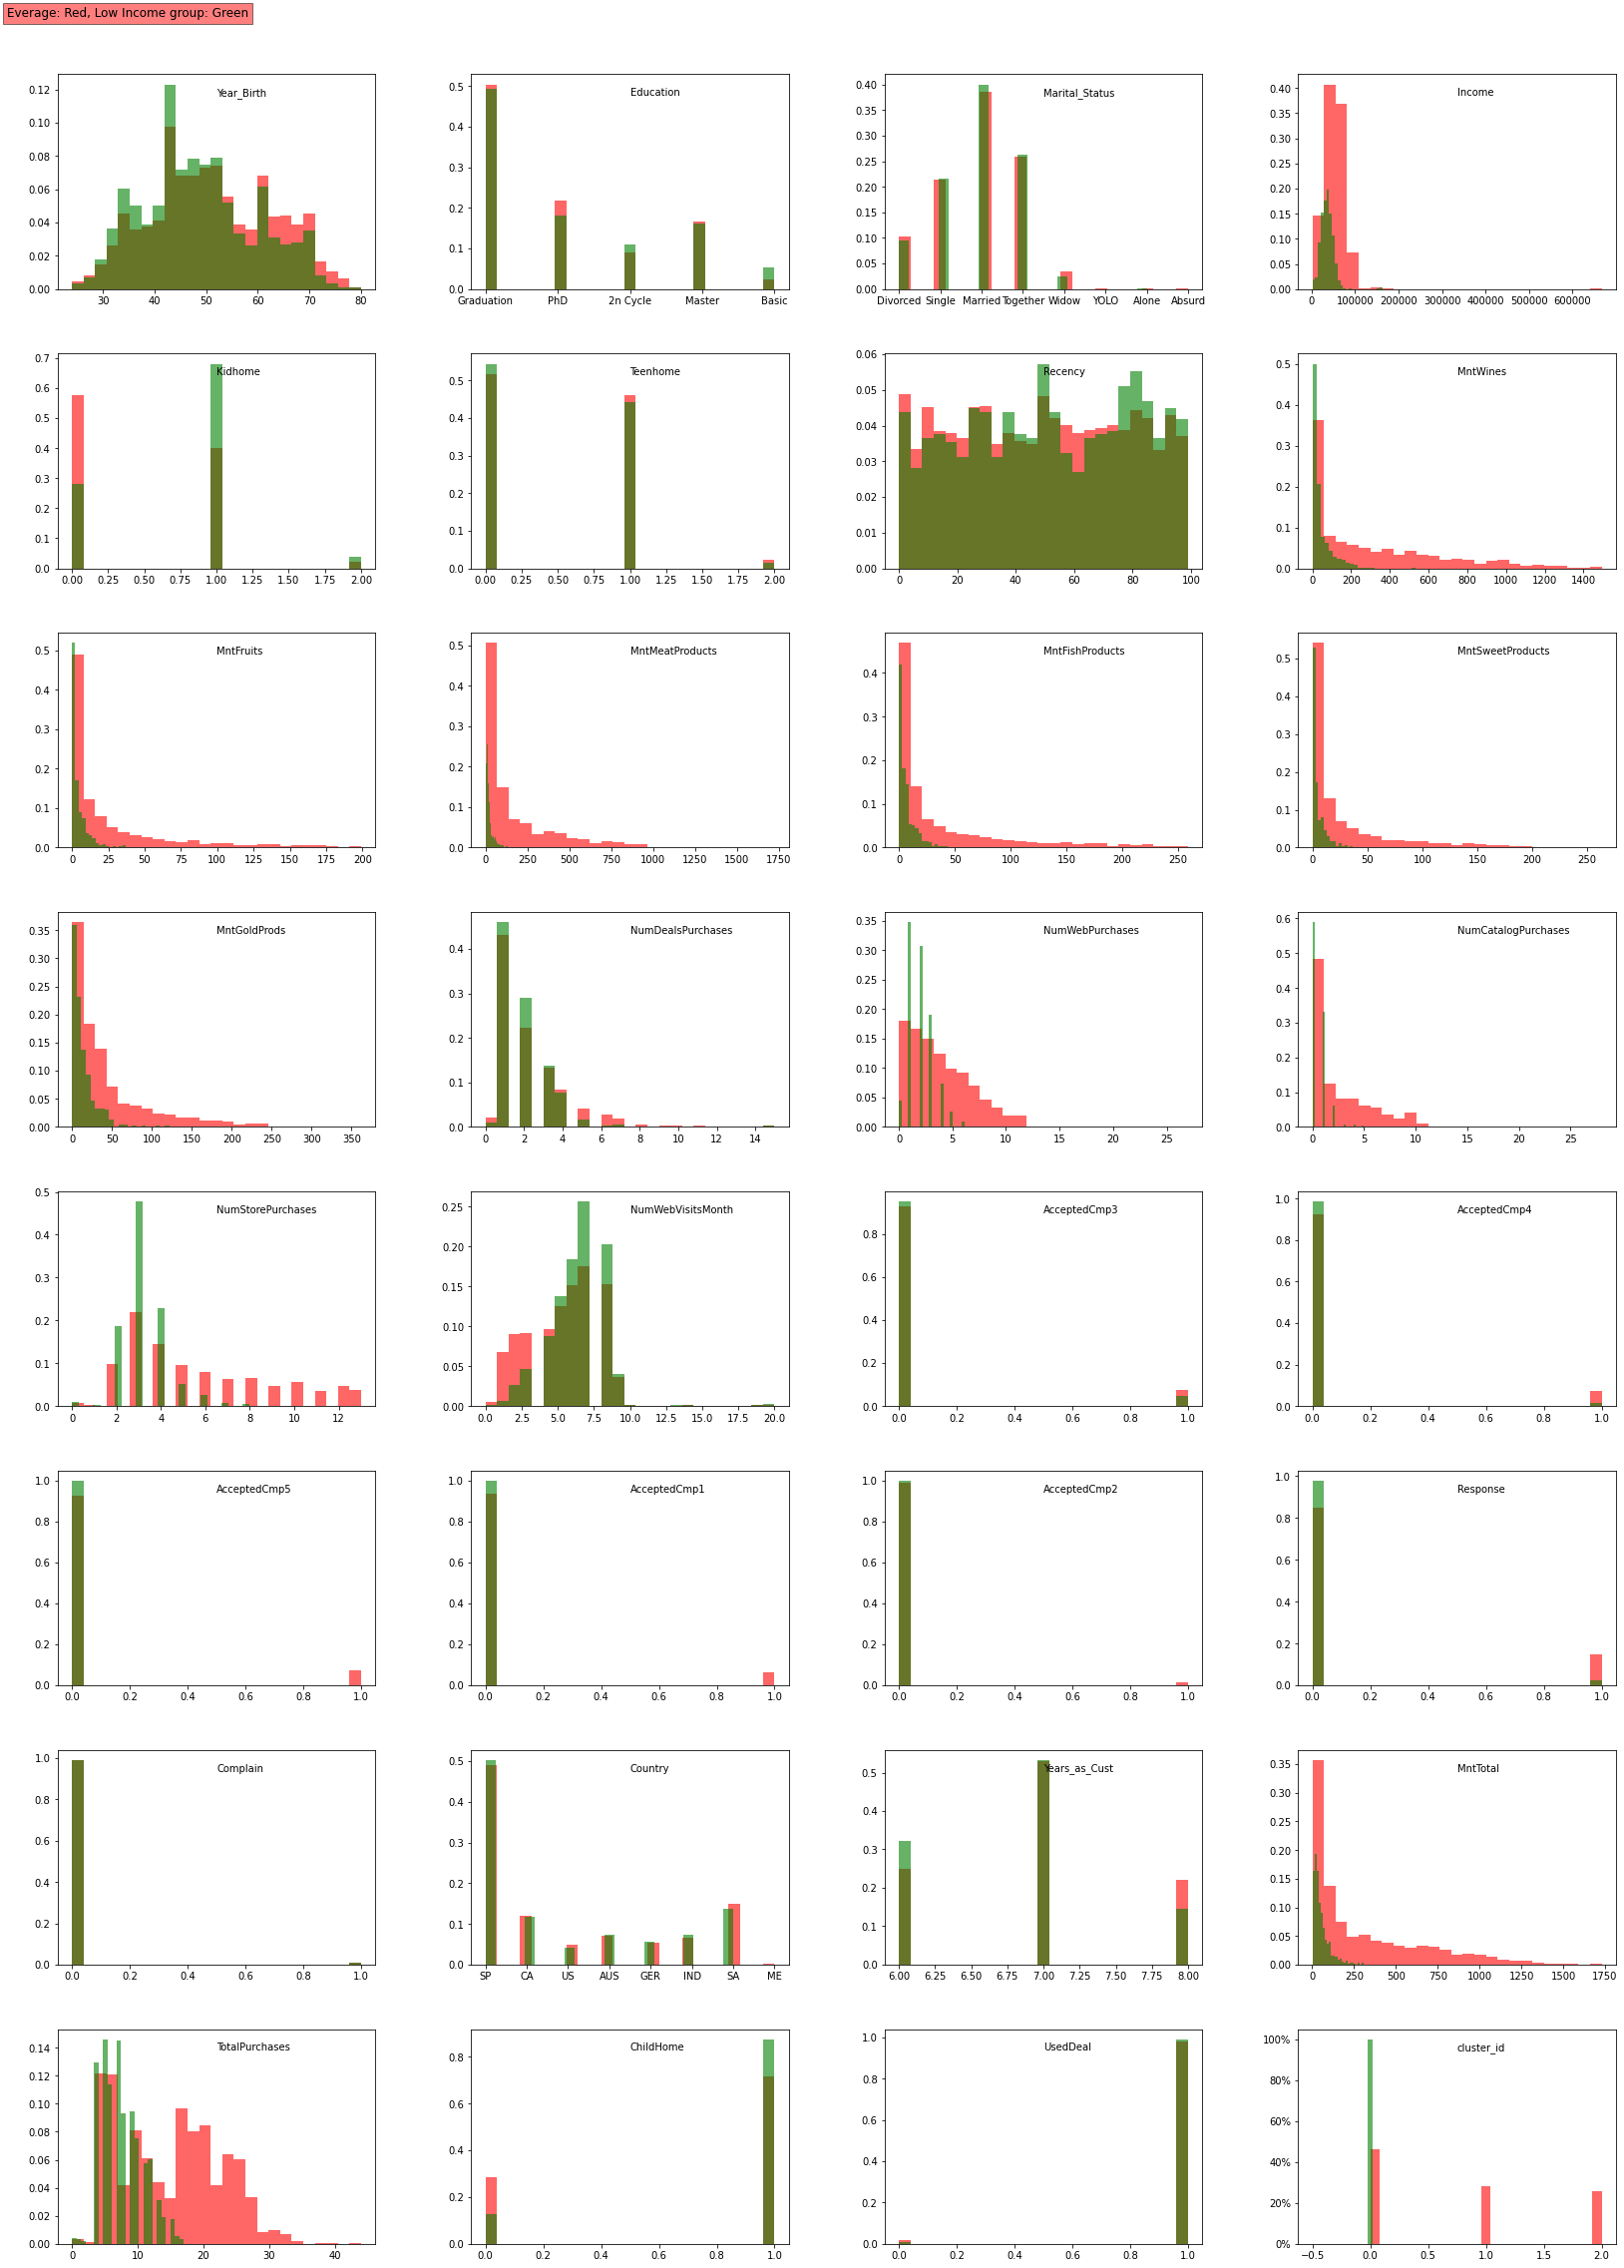

In [72]:
plt_a = mktdata.drop(['ID', 'Dt_Customer'], axis=1)
plt_b = mktdata_L.drop(['ID', 'Dt_Customer'], axis=1)


from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(8,4, figsize=(28, 40))
fig.subplots_adjust(hspace = .3, wspace=.3)

count = 0

for count, item in enumerate(axs.reshape(-1)):
  item.hist(plt_a.iloc[:,count], color = 'red',weights=np.ones(len(plt_a.iloc[:,count])) / len(plt_a.iloc[:,count]), bins=25, alpha=0.6, label=plt_a.columns[count])
  item.hist(plt_b.iloc[:,count], color = 'green',weights=np.ones(len(plt_b.iloc[:,count])) / len(plt_b.iloc[:,count]), bins=25, alpha=0.6, label=plt_b.columns[count])
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  #Title 
  item.text(0.5,0.9,plt_a.columns[count],transform=item.transAxes)

fig.text(0.1,0.9, 'Everage: Red, Low Income group: Green',fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

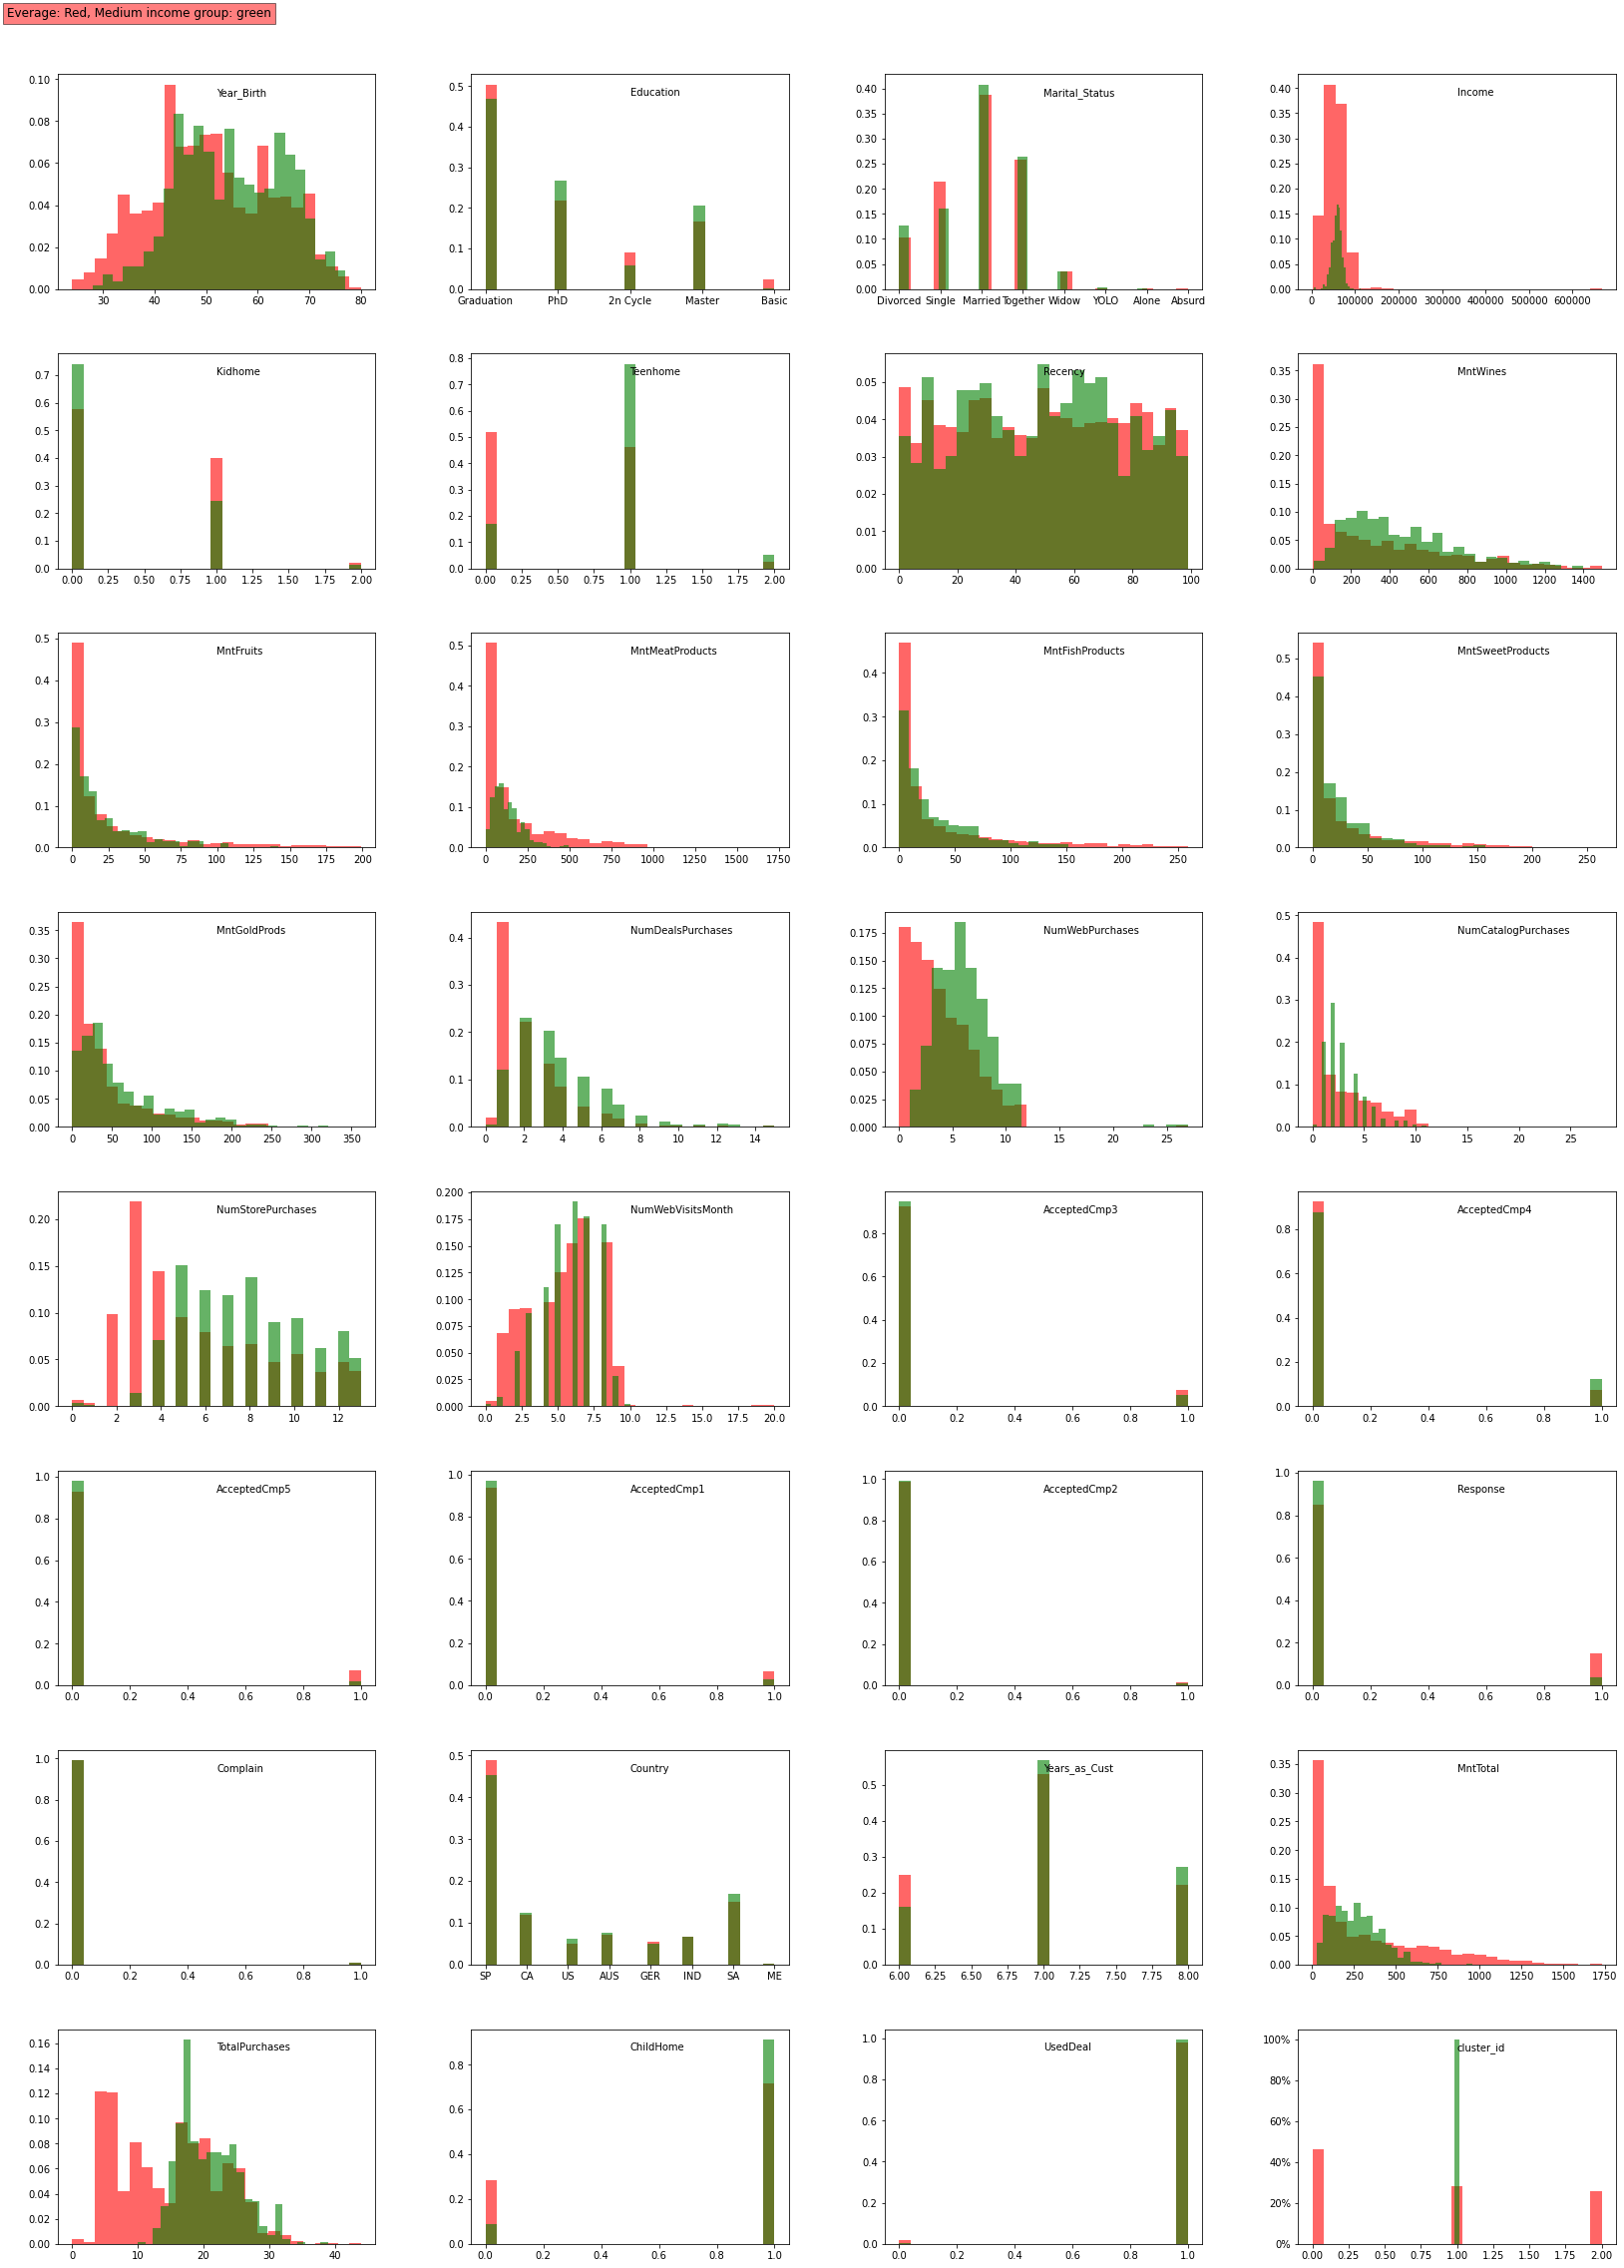

In [73]:
plt_a = mktdata.drop(['ID', 'Dt_Customer'], axis=1)
plt_b = mktdata_M.drop(['ID', 'Dt_Customer'], axis=1)


from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(8,4, figsize=(28, 40))
fig.subplots_adjust(hspace = .3, wspace=.3)

count = 0

for count, item in enumerate(axs.reshape(-1)):
  item.hist(plt_a.iloc[:,count], color = 'red',weights=np.ones(len(plt_a.iloc[:,count])) / len(plt_a.iloc[:,count]), bins=25, alpha=0.6, label=plt_a.columns[count])
  item.hist(plt_b.iloc[:,count], color = 'green',weights=np.ones(len(plt_b.iloc[:,count])) / len(plt_b.iloc[:,count]), bins=25, alpha=0.6, label=plt_b.columns[count])
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  #Title 
  item.text(0.5,0.9,plt_a.columns[count],transform=item.transAxes)

fig.text(0.1,0.9, 'Everage: Red, Medium income group: green',fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

Analytic questions to be answered:

1.	Are there any separated segments in customers' geography, number of purchased products and channels of purchases? How would each segment contribute to the success of the next campaign?
**==> Yes, we can segment our customers by income, amount of product purchased and the household with children or not. There are 3 groups: Hight income + loyal + have no children , middle income with medium amount of purchases + with children, and low income with low amount of purhases + with children.**
2.	Is there a significant relationship between geographical profile or purchase behaviour and the success of the next campaign? Can we predict the success rate?
**==> Yes we can by apply the Gradient Boosting Classifier model and predict the acceptance rate of the next campaign for each customer and also each group. The H&H group have the highest rate of response toward the next campaign while the M&M and L&L are not likely to repsonse. H&H group tend to buy more grocery stuff from us such as meat, fruits, fish but they do not purchase much gold from us and they have the lowest rate of using deal in their purchases **





# 3.	Which factors significantly impact the number of purchases for each channel?
==>


# 4.	Which marketing campaign was most successful and where was that success coming from?.  